# Variation in Projects and Production  

*Paul Bayer, 2017-08-01*

Here I outline a simple approach, how variation in production systems and projects can be treated in `PFlow`.

I start with three sources of variation:

1. variation in job execution time
2. variation in failures
3. variation in repair time.

## Variation in job execution time

Let's say we have a job, which is usually done in 5, but which takes at minimum 2.5 minutes (half the mean time). Depending on the job and on the server, who executes it, we have a variation which is bigger or smaller.

Since mostly there are waiting and queueing times involved, we model the variation with an [Erlang](https://en.wikipedia.org/wiki/Erlang_distribution) distribution.

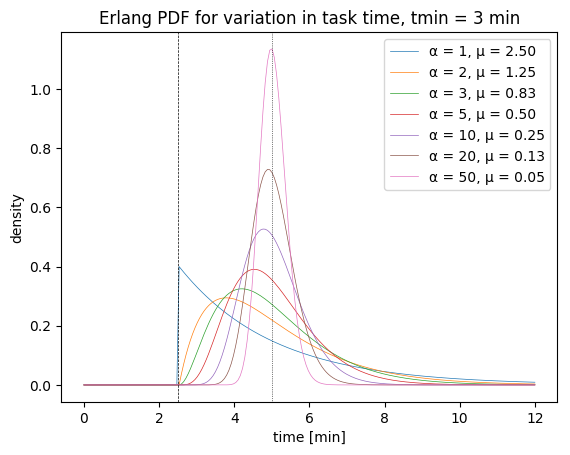

In [1]:
using Distributions, PyPlot

tmin = 2.5
t = linspace(0, 12, 200)
d = zeros(200)
l = []

for α ∈ [1,2,3,5,10,20,50]  # shape parameter
    μ = (5-tmin)/α
    push!(l, @sprintf("α = %d, μ = %0.2f", α, μ))
    d[t .>= tmin] = pdf(Erlang(α, μ), t[t .<= 12-tmin])
    plot(t, d, lw=0.5)
end
axvline(tmin, color="k", ls="--", lw=0.5)
axvline(5, color="k", ls=":", lw=0.5)
xlabel("time [min]")
ylabel("density")
title("Erlang PDF for variation in task time, tmin = 3 min")
legend(l);

This reflects somehow Goldratt's theory on projects with quite large variation around estimated task execution times. He gave us as a hint that people in projects take double the mean time as a 90%–95% confidence estimate for task completion. We can see this with a cumulative distribution function: 

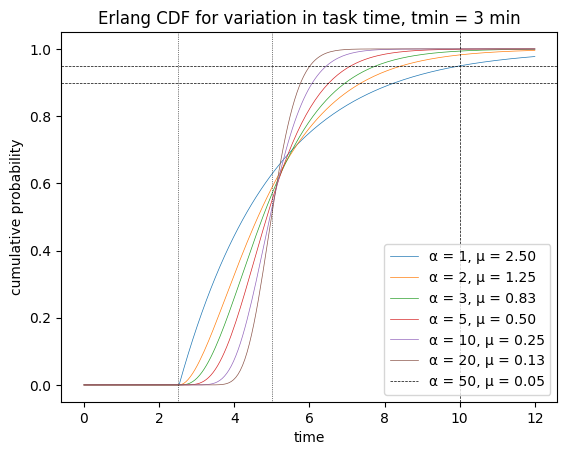

In [2]:
c = zeros(200)
for α ∈ [1,2,3,5,10,20]  # shape parameter
    μ = (5-tmin)/α
    c[t .>= tmin] = cdf(Erlang(α, μ), t[t .<= 12-tmin])
    plot(t, c, lw=0.5)
end
axhline(0.9, color="k", ls="--", lw=0.5)
axhline(0.95, color="k", ls="--", lw=0.5)
axvline(tmin, color="k", ls=":", lw=0.5)
axvline(5, color="k", ls=":", lw=0.5)
axvline(10, color="k", ls="--", lw=0.5)
xlabel("time")
ylabel("cumulative probability")
title("Erlang CDF for variation in task time, tmin = 3 min")
legend(l);

The CDF with $\alpha = 1$ cuts the timeline of 10 minutes = $2 \overline{t}$ at a probability of 95%. This means that for task duration we set in a projects environment α = 1, in a series production environment to 50 or even 100.

My proposed algorithm to calculate the task time variation is to give the mean time $\overline{t}$ and the shape parameter $\alpha$ for the Erlang distribution, then to set the minimum time $t_{min} = \overline{t}/2$. The scale parameter $\mu$ for the Erlang distribution is then calculated as:

$$\mu = \frac{t_{min}}{\alpha}$$

If we account for Goldratt's theory above, then we must take for projects **half the estimated task time** as $\overline{t}$. But this is probably realistic only if projects are managed according to the CC (critical chain) methodology.

## Variation in failures

The variation in failures is normally seen as random process. We can model it with an exponential distribution with the shape parameter $\beta = $ MTBF (mean time between failures).

## Variation in repairtimes

The variation in repairtime can be modeled with an Erlang distribution according to the strategy above with $\overline{t} = $ MTTR (mean time to repair) and a shape parameter $\alpha = 1$.